In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
dpi=60

### Read and Split the Data

In [2]:
daily_data = pd.read_csv("consumption_daily.csv",index_col=0, parse_dates=True, squeeze=True)
daily_data_train= pd.DataFrame(daily_data["2016":"2018"],copy=True)
daily_data_test = pd.DataFrame(daily_data["2019"],copy=True)

In [3]:
daily_data_train.describe()

,Consumption
count,1096.000000
mean,781992.697135
std,79533.381723
min,513805.390000
25%,731733.355000
50%,779536.385000
75%,835328.205000
max,979214.980000


# Decomposition

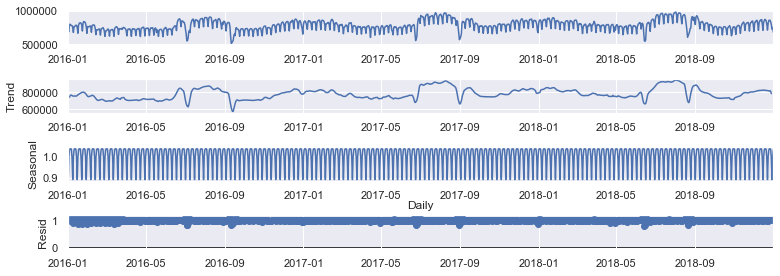

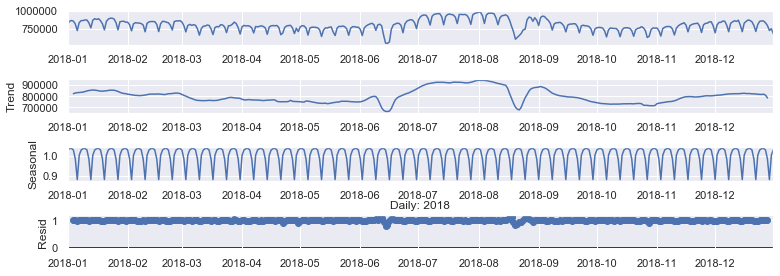

In [4]:
#Decomposion to see the trend and seasonality, and the residuals, when taking those out.
daily_decomposed = seasonal_decompose(daily_data_train, model='multiplicative', period=7)
daily_decomposed.plot()
plt.title("Daily")
plt.savefig('decomposed.svg', format='svg')
plt.show()
# looking 1 year to see seasonality.
seasonal_decompose(daily_data_train["2018"], model='multiplicative', period=7).plot()
plt.title("Daily: 2018")
plt.show()

# Stationarity Test

In [5]:
#Augmented Dickey Fuller Test for stationarity. (Decomposed Data)
adftest = adfuller(daily_decomposed.resid.dropna())
print("P-Value of ADF Test: ",adftest[1])

P-Value of ADF Test:  1.5131385285737322e-21


In [6]:
#Augmented Dickey Fuller Test for stationarity. (Data)

adftest = adfuller(daily_data)
print("P-Value of ADF Test: ",adftest[1])

P-Value of ADF Test:  0.00272237329253214


# ACF and PACF Plots

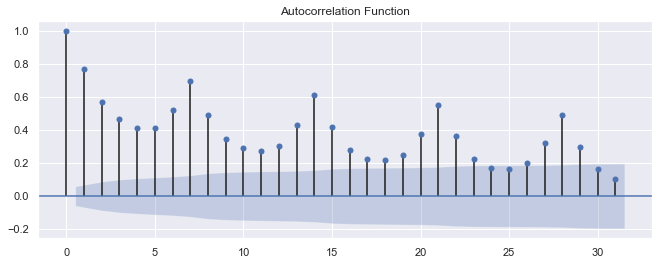

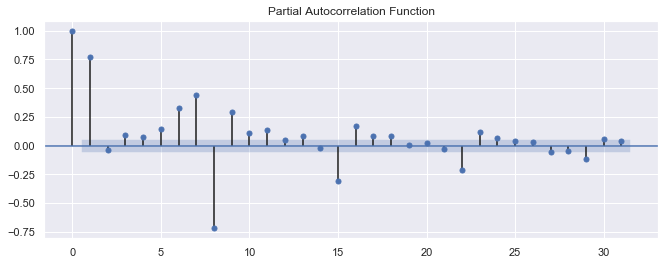

In [7]:
sm.graphics.tsa.plot_acf(daily_data_train["Consumption"], alpha=0.05)
plt.title("Autocorrelation Function")
plt.savefig('acf.svg', format='svg')

plt.show()

sm.graphics.tsa.plot_pacf(daily_data_train["Consumption"])
plt.savefig('pacf.svg', format='svg')

plt.title("Partial Autocorrelation Function")
plt.show()

# Histogram

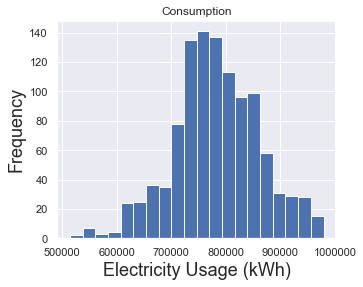

In [8]:
sns.set(rc={'figure.figsize':(5, 4)})
daily_data_train.hist(bins=20)
plt.xlabel('Electricity Usage (kWh)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.savefig('histogram.svg', format='svg')
plt.show()


# Outliers

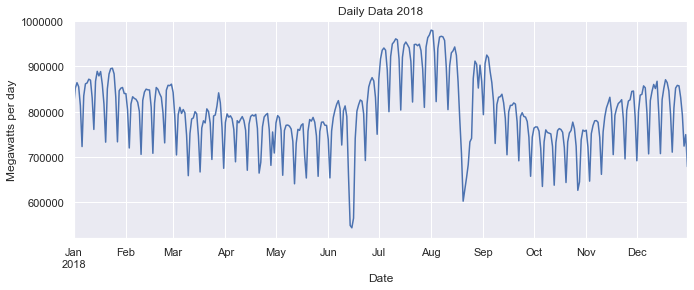

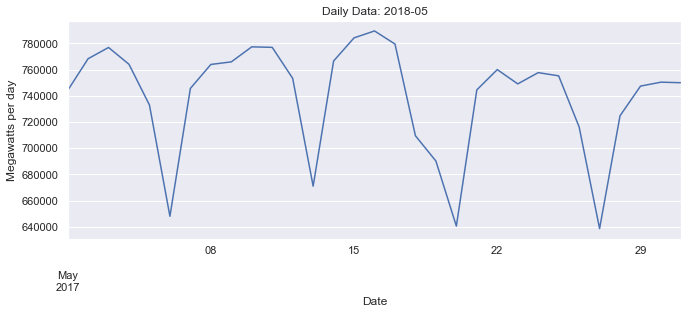

In [9]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
daily_data["2018"].plot()
plt.title("Daily Data 2018")
plt.ylabel("Megawatts per day")
plt.savefig("outlier1.svg", format='svg')
plt.show()



daily_data["2017-05"].plot()
plt.title("Daily Data: 2018-05")
plt.ylabel("Megawatts per day")
plt.savefig("outlier2.svg", format='svg')
plt.show()